# **House Price Prediction using Linear Regression**
**Author:** Zahid Khan
**Date:** 2025/8/9

## **Objective**
Build a regression model to predict house prices using the Kaggle House Prices dataset, while explaining the concepts, math, and code.

---


## **1. Introduction**
**Linear Regression** is a statistical method for modeling the relationship between a dependent variable \( y \) and one or more independent variables \( x \).  

### **Formula**
\[
y = m_1x_1 + m_2x_2 + ... + b
\]
Where:  
- \( y \): Target variable (SalePrice)  
- \( x_i \): Features (e.g., square footage, quality)  
- \( m_i \): Coefficients (weights)  
- \( b \): Bias term  

Our goal is to minimize:
\[
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]


In [1]:
# 2. Install and import required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## **3. Load the dataset**
We'll use the **House Prices** dataset from Kaggle.  
Download the `train.csv` file and upload it to your Colab session.


In [2]:
# Load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("train.csv")
df.head()


Saving train.csv to train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **4. Data Exploration**
Check data types, missing values, and basic statistics.


In [3]:
print(df.shape)
print(df.info())
print(df.describe())


(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [13]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## **5. Target Variable Visualization**
Check distribution of SalePrice.


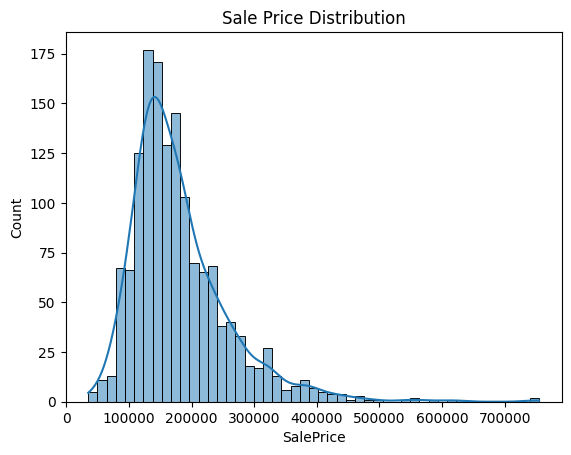

In [4]:
sns.histplot(df['SalePrice'], kde=True)
plt.title("Sale Price Distribution")
plt.show()


## **6. Feature Selection**
For simplicity, start with two features:
- **GrLivArea**: Above-ground living area  
- **OverallQual**: Overall material and finish quality


In [14]:
X = df[['GrLivArea', 'OverallQual']]
y = df['SalePrice']


## **7. Train/Test Split**
We split the dataset into training and testing sets.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## **8. Model Training**
We use scikit-learn’s `LinearRegression` to fit the model.


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## **9. Predictions & Evaluation**
We calculate RMSE and R² to evaluate the model.


In [17]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 44159.60494230218
R² Score: 0.7457643057171446


## **10. Visualization of Predictions**


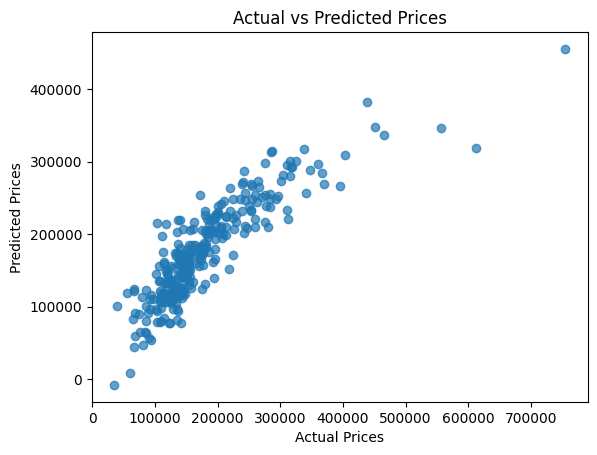

In [18]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


## **11. Coefficient Interpretation**


In [19]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


              Coefficient
GrLivArea       53.144766
OverallQual  32523.657364
